# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [7]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [8]:
# Your code here - Manipulate the addition signs
df.columns = [col.replace('+', '_and_up') for col in df.columns]
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10_and_up,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [9]:
# Your code here - Manipulate the subtraction signs
df.columns = [col.replace('-', '_to_') for col in df.columns]
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10_and_up,ages_10_to_14,ages_10_to_16,ages_10_to_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [10]:
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10_and_up', 'ages_10_to_14',
       'ages_10_to_16', 'ages_10_to_21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [11]:
# Your code here - Manipulate the blanks
df.columns = [col.replace(' ', '_') for col in df.columns]
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10_and_up,ages_10_to_14,ages_10_to_16,ages_10_to_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [12]:
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10_and_up', 'ages_10_to_14',
       'ages_10_to_16', 'ages_10_to_21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [ ]:
# Why are there 103 columns?  Do I need them all?

In [18]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = ['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']

In [ ]:
# Your code here - Split into train and test
train, test = None

In [40]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = ['piece_count', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10_and_up', 'ages_10_to_14',
       'ages_10_to_16', 'ages_10_to_21',
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown']

In [41]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2071.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:07:03   Log-Likelihood:                -56790.
No. Observations:               10870   AIC:                         1.136e+05
Df Residuals:                   10851   BIC:                         1.138e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             62.8543      1.485     42.320      0.000      59.943      65.766
piece_count                           84.4664      0.615    137.325      0.000      83.261      85.672
num_reviews                           -3.0901      0.538     -5.746      0.000      -4.144      -2.036
play_star_rating                       9.1024      0.613     14.853      0.000       7.901      10.304
star_rating                           -2.5153      0.726     -3.465      0.001      -3.938      -1.092
val_star_rating                      -13.6085      0.635    -21.420      0.000     -14.854     -12.363
ages_10_and_up                        19.3738      2.230      8.688      0.000      15.003      23.745
ages_10_to_14                         14.2227     10.007      1.421      0.155      -5.393      33.838
ages_10_to_16                          5.0783      3.786      1.341      0.180      -2.342      12.499
ages_10_to_21                         46.7494      3.406     13.727      0.000      40.074      53.425
country_NZ                             3.5209      2.063      1.707      0.088      -0.523       7.565
country_PL                             3.8175      2.128      1.794      0.073      -0.355       7.990
country_PT                             1.5418      2.099      0.735      0.463      -2.573       5.656
country_US                           -10.9679      1.744     -6.291      0.000     -14.386      -7.550
review_difficulty_Average              6.5024      1.603      4.055      0.000       3.359       9.645
review_difficulty_Challenging          4.0957      2.150      1.905      0.057      -0.118       8.310
review_difficulty_Easy                 0.7153      1.624      0.440      0.660      -2.468       3.898
review_difficulty_Very_Challenging    51.5049      8.495      6.063      0.000      34.854      68.156
review_difficulty_Very_Easy           -2.6039      2.009     -1.296      0.195      -6.543       1.335
review_difficulty_unknown              2.6399      1.774      1.488      0.137      -0.838       6.118
==============================================================================
Omnibus:                    11693.847   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1471773.444
Skew:                           5.276   Prob(JB):                         0.00
Kurtosis:                      59.020   Cond. No.                     1.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix i

In [42]:
# Your code here - Define the target and predictors
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = ['piece_count', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10_and_up',  'ages_10_to_21',
        'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Very_Challenging'
       ]

In [43]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3384.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:08:45   Log-Likelihood:                -56799.
No. Observations:               10870   AIC:                         1.136e+05
Df Residuals:                   10858   BIC:                         1.137e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             64.0767      0.622    102.974      0.000      62.857      65.296
piece_count                           84.4971      0.610    138.533      0.000      83.301      85.693
num_reviews                           -3.2995      0.534     -6.176      0.000      -4.347      -2.252
play_star_rating                       9.0860      0.611     14.875      0.000       7.889      10.283
star_rating                           -2.4331      0.724     -3.362      0.001      -3.852      -1.014
val_star_rating                      -13.5053      0.634    -21.303      0.000     -14.748     -12.263
ages_10_and_up                        18.5761      2.218      8.377      0.000      14.229      22.923
ages_10_to_21                         47.0215      3.375     13.934      0.000      40.406      53.637
country_US                           -11.5084      1.734     -6.636      0.000     -14.908      -8.109
review_difficulty_Average              5.8755      1.000      5.878      0.000       3.916       7.835
review_difficulty_Challenging          4.1128      2.038      2.018      0.044       0.117       8.108
review_difficulty_Very_Challenging    50.3956      9.943      5.068      0.000      30.905      69.886
==============================================================================
Omnibus:                    11676.057   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1467184.857
Skew:                           5.262   Prob(JB):                         0.00
Kurtosis:                      58.934   Cond. No.                         34.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Your code here - Fit the actual model

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     7148.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:53:16   Log-Likelihood:                -56971.
No. Observations:               10870   AIC:                         1.140e+05
Df Residuals:                   10864   BIC:                         1.140e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.3091      0.439    153.496      0.000      66.450      68.169
piece_count         84.9067      0.526    161.402      0.000      83.876      85.938
num_reviews         -3.6279      0.526     -6.897      0.000      -4.659      -2.597
play_star_rating     7.6996      0.562     13.697      0.000       6.598       8.802
star_rating         -0.9290      0.715     -1.300      0.194      -2.330       0.472
val_star_rating    -13.7330      0.642    -21.400      0.000     -14.991     -12.475
==============================================================================
Omnibus:                    11557.676   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1346072.457
Skew:                           5.198   Prob(JB):                         0.00
Kurtosis:                      56.516   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [20]:
# Your code here - Remove features which do not appear to be statistically relevant
outcome = 'list_price'
x_cols = ['piece_count', 'num_reviews', 'play_star_rating','val_star_rating']

In [21]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     8934.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:53:38   Log-Likelihood:                -56972.
No. Observations:               10870   AIC:                         1.140e+05
Df Residuals:                   10865   BIC:                         1.140e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.3091      0.439    153.491      0.000      66.450      68.169
piece_count         84.8725      0.525    161.534      0.000      83.843      85.902
num_reviews         -3.6192      0.526     -6.880      0.000      -4.650      -2.588
play_star_rating     7.3757      0.504     14.637      0.000       6.388       8.363
val_star_rating    -14.2504      0.503    -28.306      0.000     -15.237     -13.264
==============================================================================
Omnibus:                    11556.386   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1345308.280
Skew:                           5.197   Prob(JB):                         0.00
Kurtosis:                      56.500   Cond. No.                         1.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [ ]:
# Your code here - Continue to refine the model

In [ ]:
# Your code here - Refit the model

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [22]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('piece_count', 1.4354381636116413),
 ('num_reviews', 1.438721276903239),
 ('play_star_rating', 1.3203902895965547),
 ('val_star_rating', 1.3178494728336765)]

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [ ]:
# Your code here - Subset features based on multicollinearity

In [ ]:
# Your code here - Refit model with subset features

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

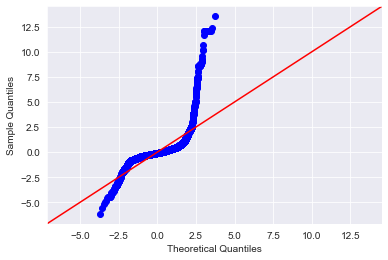

In [25]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

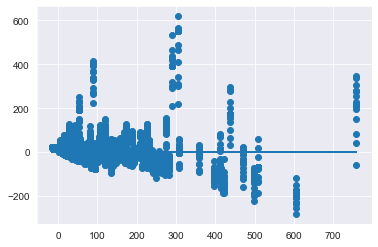

In [26]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [27]:
# Your code here - Check for outliers
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['list_price'].quantile(q=q)))

0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88


In [28]:
# Your code here
# Remove extreme outliers
subset = df[df['list_price'] < 220]
print('Percent removed:',(len(df) - len(subset))/len(df))

Percent removed: 0.050045998160073595


In [29]:
# Rerun the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     8934.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:58:16   Log-Likelihood:                -56972.
No. Observations:               10870   AIC:                         1.140e+05
Df Residuals:                   10865   BIC:                         1.140e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.3091      0.439    153.491      0.000      66.450      68.169
piece_count         84.8725      0.525    161.534      0.000      83.843      85.902
num_reviews         -3.6192      0.526     -6.880      0.000      -4.650      -2.588
play_star_rating     7.3757      0.504     14.637      0.000       6.388       8.363
val_star_rating    -14.2504      0.503    -28.306      0.000     -15.237     -13.264
==============================================================================
Omnibus:                    11556.386   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1345308.280
Skew:                           5.197   Prob(JB):                         0.00
Kurtosis:                      56.500   Cond. No.                         1.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

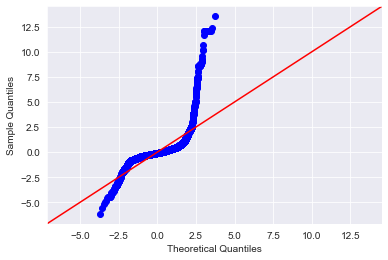

In [30]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

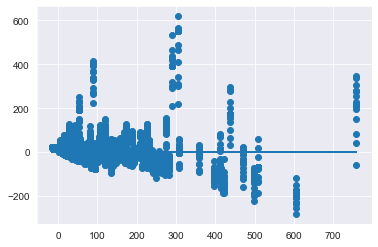

In [31]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 

In [44]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [45]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [46]:
df.columns = [col_formatting(col) for col in df.columns]


In [47]:
list(df.columns)


['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [49]:
# Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [50]:
train, test = train_test_split(df)


In [51]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
4827,-0.475135,12.0000,-0.147162,0.216064,0.368848,0.922564,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10485,-0.141885,42.6878,-0.175090,-2.049427,-1.496559,-0.525957,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7200,-0.463104,18.2878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10681,-0.152713,47.5678,-0.175090,0.738870,0.161581,0.117830,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6893,1.758960,237.9860,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
7756,-0.597848,18.2878,-0.286801,0.216064,0.161581,0.117830,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
304,-0.599051,4.9900,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3385,0.225050,86.5980,0.969951,0.738870,0.368848,0.278777,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
255,-0.516039,9.9900,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10215,-0.605066,57.9971,-0.370585,1.087407,0.990651,-1.491638,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [53]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     541.9
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:12:28   Log-Likelihood:                -40623.
No. Observations:                8152   AIC:                         8.144e+04
Df Residuals:                    8057   BIC:                         8.210e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.9059      1.803     34.883      0.000      59.371      66.441
piece_count                                         76.6277      0.931     82.330      0.000      74.803      78.452
num_reviews                                          6.8403      0.715      9.571      0.000       5.439       8.241
play_star_rating                                     5.3188      0.625      8.511      0.000       4.094       6.544
star_rating                                         -1.3351      0.716     -1.865      0.062      -2.738       0.068
val_star_rating                                     -8.6354      0.639    -13.510      0.000      -9.888      -7.382
ages_10plus                                        124.8826      6.791     18.390      0.000     111.571     138.195
ages_10_14                                         -23.0882      9.299     -2.483      0.013     -41.317      -4.859
ages_10_16                                         -11.8514      4.077     -2.907      0.004     -19.843      -3.860
ages_10_21                                          53.5074      7.538      7.098      0.000      38.730      68.285
ages_11_16                                         -23.0202      5.817     -3.957      0.000     -34.424     -11.616
ages_12plus                                         71.1077      5.926     11.999      0.000      59.491      82.725
ages_12_16                                         -60.7282      6.759     -8.984      0.000     -73.979     -47.478
ages_14plus                                         30.5108      4.281      7.127      0.000      22.119      38.902
ages_16plus                                         26.8095      6.209      4.318      0.000      14.639      38.981
ages_1half_3                                        -9.4383      2.399     -3.935      0.000     -14.140      -4.736
ages_1half_5                                        -3.7402      2.994     -1.249      0.212      -9.609       2.129
ages_2_5                                            15.3384      1.693      9.058      0.000      12.019      18.658
ages_4plus                                         -19.5413      6.414     -3.047      0.002     -32.114      -6.969
ages_4_7                                            -5.9151      3.376     -1.752      0.080     -12.532       0.702
ages_4_99                                           -2.6129      3.673     -0.711      0.477      -9.813       4.587
ages_5plus                                          -9.6266      3.175     -3.032      0.002     -15.851      -3.403
ages_5_12                                          -34.6957      3.209    -10.811      0.000     -40.987     -28.405
ages_5_8                                 

In [54]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 74
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.9059,1.803,34.883,0.000,59.371,66.441
piece_count,76.6277,0.931,82.330,0.000,74.803,78.452
num_reviews,6.8403,0.715,9.571,0.000,5.439,8.241
play_star_rating,5.3188,0.625,8.511,0.000,4.094,6.544
star_rating,-1.3351,0.716,-1.865,0.062,-2.738,0.068


In [55]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     697.7
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:13:19   Log-Likelihood:                -40633.
No. Observations:                8152   AIC:                         8.141e+04
Df Residuals:                    8078   BIC:                         8.193e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           61.5350      2.147     28.664      0.000      57.327      65.743
piece_count                                         76.5866      0.916     83.569      0.000      74.790      78.383
num_reviews                                          6.8728      0.695      9.893      0.000       5.511       8.235
play_star_rating                                     4.9225      0.529      9.309      0.000       3.886       5.959
val_star_rating                                     -9.2980      0.502    -18.508      0.000     -10.283      -8.313
ages_10plus                                        130.4961      7.757     16.822      0.000     115.289     145.703
ages_10_14                                         -18.7429      9.661     -1.940      0.052     -37.681       0.195
ages_10_16                                          -8.3267      3.924     -2.122      0.034     -16.018      -0.635
ages_10_21                                          59.3617      8.291      7.160      0.000      43.110      75.613
ages_11_16                                         -19.4393      5.691     -3.416      0.001     -30.594      -8.284
ages_12plus                                         76.5215      6.929     11.044      0.000      62.939      90.104
ages_12_16                                         -56.5755      7.130     -7.935      0.000     -70.551     -42.600
ages_14plus                                         36.0890      4.661      7.742      0.000      26.952      45.226
ages_16plus                                         30.8287      6.974      4.420      0.000      17.157      44.500
ages_1half_3                                        -1.7900      3.120     -0.574      0.566      -7.906       4.325
ages_2_5                                            22.4184      2.014     11.130      0.000      18.470      26.367
ages_4plus                                         -18.0136      9.847     -1.829      0.067     -37.316       1.289
ages_5plus                                          -7.3276      3.197     -2.292      0.022     -13.595      -1.060
ages_5_12                                          -28.6163      2.716    -10.534      0.000     -33.941     -23.291
ages_6plus                                         -20.2990      5.753     -3.529      0.000     -31.576      -9.022
ages_6_12                                          -16.2474      1.908     -8.517      0.000     -19.987     -12.508
ages_7_12                                          -14.7956      2.260     -6.547      0.000     -19.226     -10.366
ages_7_14                                          -10.9162      1.996     -5.469      0.000     -14.829      -7.003
ages_8plus                               

In [56]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

//anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.856818489933661),
 ('num_reviews', 2.867477885270561),
 ('play_star_rating', 1.8286698331038074),
 ('val_star_rating', 1.6362741041839688),
 ('ages_10plus', 18.33639165325121),
 ('ages_10_14', 1.1108657249479716),
 ('ages_10_16', 1.2744778347313745),
 ('ages_10_21', 7.31893860803386),
 ('ages_11_16', 1.2235761961978617),
 ('ages_12plus', 7.454819100967031),
 ('ages_12_16', 1.2482691958672687),
 ('ages_14plus', 2.1367402092162453),
 ('ages_16plus', 10.250215579769904),
 ('ages_1half_3', 1.2140354800495001),
 ('ages_2_5', 1.5567966070771644),
 ('ages_4plus', 1.1996166412882687),
 ('ages_5plus', inf),
 ('ages_5_12', 3.52283569513134),
 ('ages_6plus', 2.7474925847565967),
 ('ages_6_12', 2.651707393914061),
 ('ages_7_12', 1.9357198251422445),
 ('ages_7_14', 2.56444925880645),
 ('ages_8plus', 3.3894880440804234),
 ('ages_8_12', 1.4953758561079582),
 ('ages_8_14', 2.6200977042318128),
 ('ages_9plus', 1.5724908863640432),
 ('ages_9_12', 1.0501727673371701),
 ('ages_9_14', 2.

In [57]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

74 65


In [58]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     695.5
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:14:55   Log-Likelihood:                -41052.
No. Observations:                8152   AIC:                         8.224e+04
Df Residuals:                    8086   BIC:                         8.270e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.7375      1.866     35.236      0.000      62.080      69.395
piece_count                                         77.2295      0.719    107.443      0.000      75.820      78.639
num_reviews                                          5.0076      0.680      7.364      0.000       3.675       6.341
play_star_rating                                     6.7770      0.498     13.617      0.000       5.801       7.753
val_star_rating                                    -11.2588      0.500    -22.495      0.000     -12.240     -10.278
ages_10_14                                         -39.4234     10.060     -3.919      0.000     -59.144     -19.703
ages_10_16                                         -18.2448      3.797     -4.805      0.000     -25.688     -10.802
ages_11_16                                         -31.1139      5.529     -5.627      0.000     -41.953     -20.275
ages_12_16                                         -69.3175      6.918    -10.019      0.000     -82.879     -55.756
ages_14plus                                         16.5225      3.932      4.202      0.000       8.815      24.230
ages_1half_3                                        -8.6332      3.143     -2.747      0.006     -14.794      -2.472
ages_2_5                                            15.6129      1.893      8.246      0.000      11.901      19.324
ages_4plus                                          -5.9292     10.288     -0.576      0.564     -26.097      14.238
ages_5_12                                          -36.0173      2.701    -13.337      0.000     -41.311     -30.724
ages_6plus                                         -27.6895      5.970     -4.638      0.000     -39.392     -15.987
ages_6_12                                          -25.1702      1.720    -14.631      0.000     -28.543     -21.798
ages_7_12                                          -22.9404      2.137    -10.733      0.000     -27.130     -18.751
ages_7_14                                          -19.1276      1.858    -10.295      0.000     -22.770     -15.486
ages_8plus                                          -0.6833      4.563     -0.150      0.881      -9.629       8.262
ages_8_12                                          -22.0150      2.719     -8.095      0.000     -27.346     -16.684
ages_8_14                                          -20.6968      1.970    -10.503      0.000     -24.559     -16.834
ages_9plus                                          13.3350     10.198      1.308      0.191      -6.656      33.326
ages_9_12                                          -33.9000      7.317     -4.633      0.000     -48.244     -19.556
ages_9_14                                

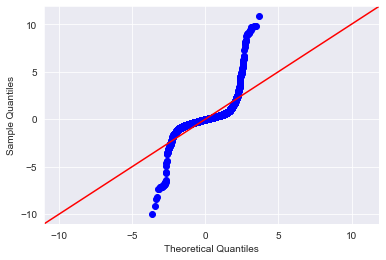

In [59]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


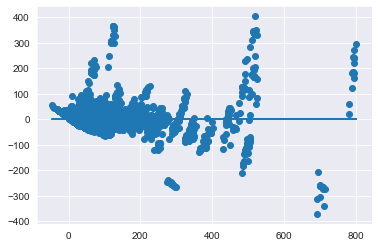

In [60]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

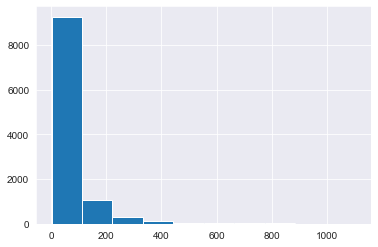

In [61]:
df.list_price.hist()


In [62]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [63]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     410.1
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:17:26   Log-Likelihood:                -4704.8
No. Observations:                8067   AIC:                             9542.
Df Residuals:                    8001   BIC:                         1.000e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.1825      0.022    145.060      0.000       3.139       3.225
piece_count                                          0.5817      0.010     57.069      0.000       0.562       0.602
num_reviews                                          0.0126      0.008      1.602      0.109      -0.003       0.028
play_star_rating                                     0.1095      0.006     18.812      0.000       0.098       0.121
val_star_rating                                     -0.1583      0.006    -27.206      0.000      -0.170      -0.147
ages_10_14                                           0.3143      0.125      2.509      0.012       0.069       0.560
ages_10_16                                           0.5677      0.045     12.508      0.000       0.479       0.657
ages_11_16                                           0.3221      0.068      4.764      0.000       0.190       0.455
ages_12_16                                          -0.1173      0.088     -1.335      0.182      -0.289       0.055
ages_14plus                                          0.4387      0.048      9.102      0.000       0.344       0.533
ages_1half_3                                        -0.4748      0.038    -12.377      0.000      -0.550      -0.400
ages_2_5                                             0.4042      0.022     18.565      0.000       0.362       0.447
ages_4plus                                          -1.2431      0.123    -10.134      0.000      -1.484      -1.003
ages_5_12                                           -0.7619      0.032    -23.993      0.000      -0.824      -0.700
ages_6plus                                          -0.9758      0.065    -15.061      0.000      -1.103      -0.849
ages_6_12                                           -0.1921      0.020     -9.664      0.000      -0.231      -0.153
ages_7_12                                            0.0450      0.025      1.812      0.070      -0.004       0.094
ages_7_14                                           -0.0549      0.022     -2.506      0.012      -0.098      -0.012
ages_8plus                                           0.6090      0.054     11.374      0.000       0.504       0.714
ages_8_12                                            0.1964      0.032      6.125      0.000       0.134       0.259
ages_8_14                                            0.2810      0.023     12.010      0.000       0.235       0.327
ages_9plus                                           0.1993      0.121      1.643      0.100      -0.038       0.437
ages_9_12                                            0.2679      0.076      3.514      0.000       0.118       0.417
ages_9_14                                

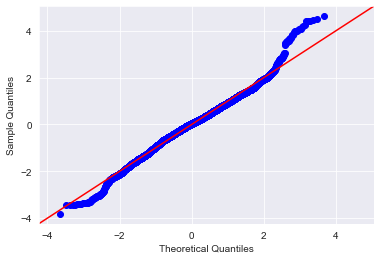

In [64]:
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

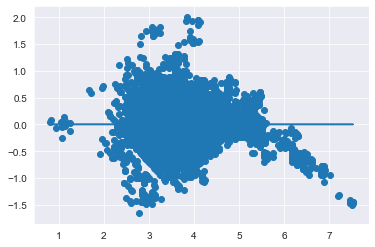

In [65]:
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


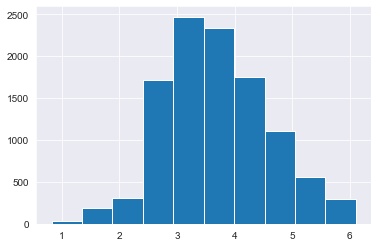

In [66]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [67]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     401.9
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:18:47   Log-Likelihood:                -4565.4
No. Observations:                8027   AIC:                             9263.
Df Residuals:                    7961   BIC:                             9724.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.1898      0.022    143.076      0.000       3.146       3.233
piece_count                                          0.6123      0.011     56.371      0.000       0.591       0.634
num_reviews                                          0.0123      0.008      1.547      0.122      -0.003       0.028
play_star_rating                                     0.1034      0.006     17.603      0.000       0.092       0.115
val_star_rating                                     -0.1572      0.006    -26.703      0.000      -0.169      -0.146
ages_10_14                                           0.3744      0.106      3.517      0.000       0.166       0.583
ages_10_16                                           0.5692      0.044     12.904      0.000       0.483       0.656
ages_11_16                                           0.2733      0.070      3.907      0.000       0.136       0.410
ages_12_16                                          -0.1300      0.084     -1.546      0.122      -0.295       0.035
ages_14plus                                          0.4352      0.049      8.896      0.000       0.339       0.531
ages_1half_3                                        -0.5461      0.036    -15.158      0.000      -0.617      -0.475
ages_2_5                                             0.4085      0.022     18.865      0.000       0.366       0.451
ages_4plus                                          -1.2536      0.121    -10.343      0.000      -1.491      -1.016
ages_5_12                                           -0.7655      0.031    -24.538      0.000      -0.827      -0.704
ages_6plus                                          -0.9762      0.064    -15.273      0.000      -1.102      -0.851
ages_6_12                                           -0.1878      0.020     -9.402      0.000      -0.227      -0.149
ages_7_12                                            0.0490      0.025      1.976      0.048       0.000       0.098
ages_7_14                                           -0.0522      0.021     -2.431      0.015      -0.094      -0.010
ages_8plus                                           0.6058      0.051     11.855      0.000       0.506       0.706
ages_8_12                                            0.2188      0.031      7.051      0.000       0.158       0.280
ages_8_14                                            0.2835      0.023     12.298      0.000       0.238       0.329
ages_9plus                                           0.2100      0.127      1.657      0.097      -0.038       0.458
ages_9_12                                            0.2900      0.073      3.963      0.000       0.147       0.433
ages_9_14                                

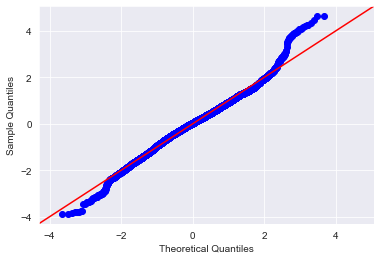

In [68]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

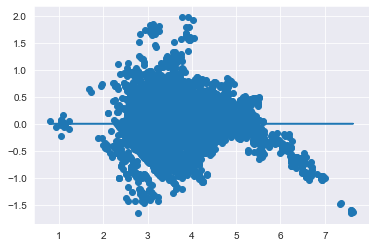

In [69]:
# Comment: No improvement observed
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [70]:
x_cols = ['piece_count', 'country_US']


In [71]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     4404.
Date:                Tue, 28 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:19:56   Log-Likelihood:                -7428.5
No. Observations:                8027   AIC:                         1.486e+04
Df Residuals:                    8024   BIC:                         1.488e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7369      0.007    528.320      0.000       3.723       3.751
piece_count     0.7881      0.008     93.244      0.000       0.772       0.805
country_US     -0.2721      0.027     -9.896      0.000      -0.326      -0.218
==============================================================================
Omnibus:                      483.809   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.325
Skew:                          -0.516   Prob(JB):                    3.83e-157
Kurtosis:                       4.043   Cond. No.                         4.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

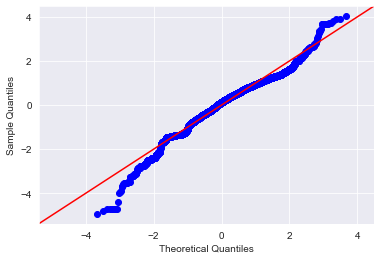

In [72]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


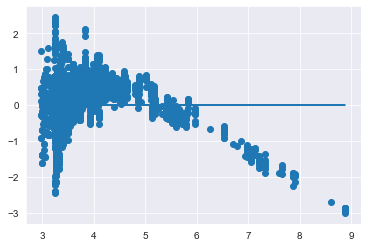

In [73]:
# Comment: Certainly not as strong a model, but with only 2 features, 
# over half the model performance was recovered.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])